<a href="https://colab.research.google.com/github/ricardoruiz19/TalentoTech/blob/main/IrisDataset_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://www.kaggle.com/code/joeportilla/analisis-exploratorio-de-datos-dataset-iris?scriptVersionId=124625192" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 0. Introducción


<img src="https://raw.githubusercontent.com/JoePortilla/IrisDataset-EDA/main/img/iris_eda_github.png" width="800" alt="logo" style="display:block;margin:auto;">

El dataset `Iris` es un conjunto de datos de clasificación multiclase clásico y muy sencillo. Introducido por el estadístico y biólogo británico Ronald Fisher en su artículo de 1936 "The use of multiple measurements in taxonomic problems". El conjunto de datos de Iris contiene cuatro características (longitud y anchura de sépalos y pétalos) de 50 muestras de tres especies de flores Iris (Iris setosa, Iris virginica e Iris versicolor).

<img src="https://raw.githubusercontent.com/JoePortilla/IrisDataset-EDA/main/img/iris_flowers.png" width="800" alt="logo" style="display:block;margin:auto;">

El objetivo es construir un modelo que utilice las características para clasificar las flores con un máximo de precisión.

Para alcanzar este objetivo, vamos a realizar un análisis exploratorio de datos para comprender los datos y elegir las mejores características. Este notebook se centra en explorar y visualizar el conjunto de datos utilizando bibliotecas como Seaborn y Matplotlib. El procesamiento de datos se realiza con Pandas.

## Paquetes utilizados:
- Procesamiento de datos: Pandas.
- Visualización de datos: Seaborn y Matplotlib.

## Referencias:
- [Wikipedia](https://es.wikipedia.org/wiki/Conjunto_de_datos_flor_iris)
- [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Iris/)

## Instructor:
Joseph Santiago Portilla - Ingeniero Electrónico.
- GitHub: https://github.com/JoePortilla
- Twitter: https://twitter.com/JoePortilla
- LinkedIn: https://www.linkedin.com/in/PortillaJoe
- Kaggle: https://www.kaggle.com/joeportilla


# 1. Ajustes Iniciales

## 1.1 Importación de Bibliotecas

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1.2. Definición de estilo de gráficas

In [ ]:
# https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
plt.style.use("seaborn-whitegrid")

<ipython-input-2-173c4cf2043a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


# 2. Carga de Dataset y Preprocesamiento

## 2.1. Lectura de CSV

In [ ]:
df = pd.read_csv('/content/Iris.csv')

In [ ]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## 2.2. Preprocesamiento

### Renombramiento de columnas

Se renombran las columnas para facilitar su uso.

In [ ]:
df.rename({'SepalLengthCm':'sepal_l',
           'SepalWidthCm':'sepal_w',
           'PetalLengthCm':'petal_l',
           'PetalWidthCm':'petal_w',
           'Species':'species'},
          axis=1, inplace=True)

### Eliminación de columnas

Se elimina la columna 'id', ya que no es necesario dentro del analisis.

In [ ]:
df.drop('Id', axis=1, inplace=True)

### Dataframe preprocesado

In [ ]:
df.head(7)

,sepal_l,sepal_w,petal_l,petal_w,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa


## 2.3. Exploración inicial del dataframe

### Dimensión del datafrane

In [ ]:
df.shape

(150, 5)

### Balance del dataset

El dataset esta balanceado, todas las especies tienen el mismo número de datos.

In [ ]:
df['species'].value_counts()

,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


### Comprobación de valores faltantes

El dataset esta completo y no cuenta con valores faltantes

In [ ]:
df.isnull().sum(axis=0)

,0
sepal_l,0
sepal_w,0
petal_l,0
petal_w,0
species,0


### Estimación de la asimetría (Skewness)

In [ ]:
df.drop('species', axis=1).skew()

,0
sepal_l,0.314911
sepal_w,0.334053
petal_l,-0.274464
petal_w,-0.104997


### Estimación de la curtosis

In [ ]:
df.drop('species', axis=1).kurt()

,0
sepal_l,-0.552064
sepal_w,0.290781
petal_l,-1.401921
petal_w,-1.339754


### Info. general del dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sepal_l  150 non-null    float64
 1   sepal_w  150 non-null    float64
 2   petal_l  150 non-null    float64
 3   petal_w  150 non-null    float64
 4   species  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## 2.4. Generación de dataframe para cada especie

Estos dataframes se utilizarán en el analisis multivariado

In [ ]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
filt = (df['species'] == 'Iris-setosa')
df_setosa = df.loc[filt]

In [ ]:
filt = (df['species'] == 'Iris-versicolor')
df_versicolor = df.loc[filt]

In [ ]:
filt = (df['species'] == 'Iris-virginica')
df_virginica = df.loc[filt]

# 3. Analisis Univariado

## 3.1. Estadisticas de cada columna númerica

In [ ]:
df.describe()

,sepal_l,sepal_w,petal_l,petal_w
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## 3.2. Longitud del sépalo [cm]

En la longitud del sépalo la mayor frecuencia se presenta entre 5.5 cm y 6.5 cm, con una mediana de 5.8 cm. La distribución de los datos se acercan a una distribución normal.

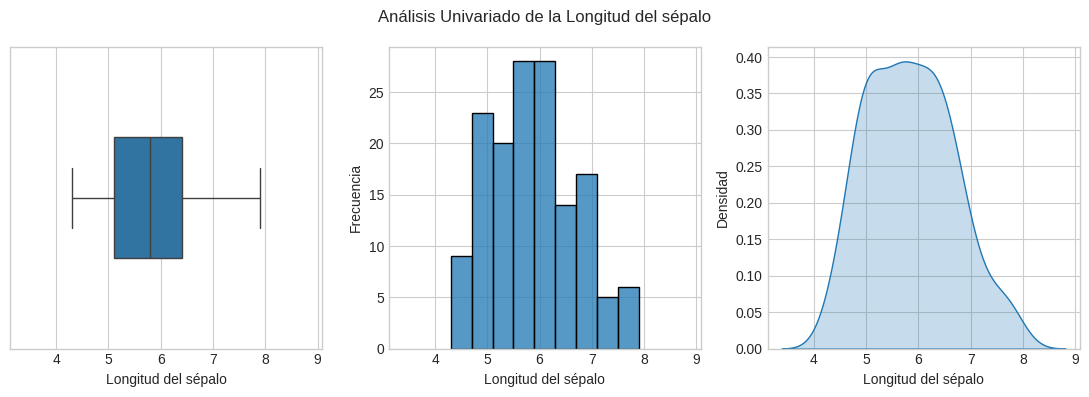

In [ ]:
var = 'sepal_l'
var_title = 'Longitud del sépalo'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(11, 4), sharex=True)

# Plotea el boxplot
sns.boxplot(data=df[var], ax=ax[0], orient='h', width=0.4)
ax[0].set_xlabel(var_title)

# Plotea el histograma
sns.histplot(data=df[var], ax=ax[1], kde=False)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Frecuencia')

# Plotea la curva de densidad
sns.kdeplot(data=df[var], ax=ax[2], fill=True)
ax[2].set_xlabel(var_title)
ax[2].set_ylabel('Densidad')

fig.suptitle('Análisis Univariado de la ' + var_title)

plt.tight_layout()

## 3.3. Ancho del sépalo [cm]

En el ancho del sépalo la mayor frecuencia se presenta en 3 cm, con una mediana de 3 cm. Lo que genera una distribución mucho más puntiaguda y con baja dispersión.

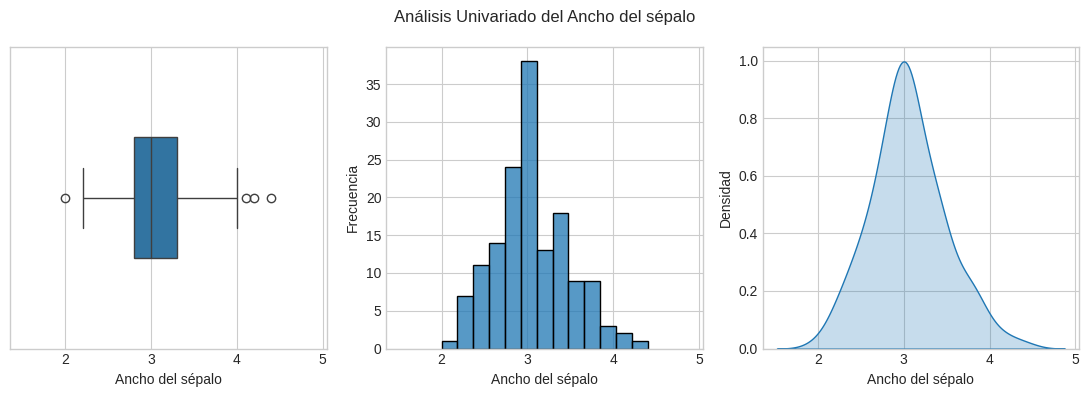

In [ ]:
var = 'sepal_w'
var_title = 'Ancho del sépalo'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(11, 4), sharex=True)

# Plotea el boxplot
sns.boxplot(data=df[var], ax=ax[0], orient='h', width=0.4)
ax[0].set_xlabel(var_title)

# Plotea el histograma
sns.histplot(data=df[var], ax=ax[1], kde=False)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Frecuencia')

# Plotea la curva de densidad
sns.kdeplot(data=df[var], ax=ax[2], fill=True)
ax[2].set_xlabel(var_title)
ax[2].set_ylabel('Densidad')

fig.suptitle('Análisis Univariado del ' + var_title)

plt.tight_layout()

## 3.4. Longitud del pétalo [cm]

En la longitud del pétalo la mayor frecuencia se presenta en 1 cm, y además tiene una frecuencia alta alrededor de 4.5 cm. Esto genera una variabilidad no normal en su distribución.

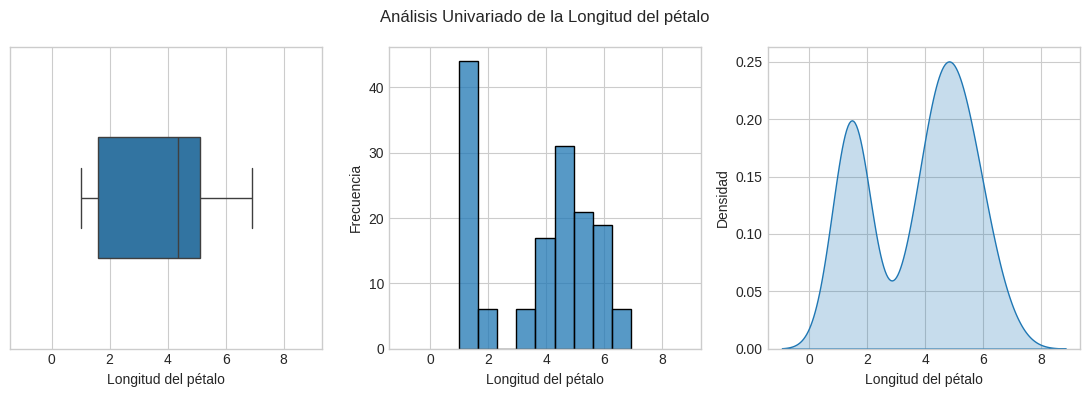

In [ ]:
var = 'petal_l'
var_title = 'Longitud del pétalo'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(11, 4), sharex=True)

# Plotea el boxplot
sns.boxplot(data=df[var], ax=ax[0], orient='h', width=0.4)
ax[0].set_xlabel(var_title)

# Plotea el histograma
sns.histplot(data=df[var], ax=ax[1], kde=False)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Frecuencia')

# Plotea la curva de densidad
sns.kdeplot(data=df[var], ax=ax[2], fill=True)
ax[2].set_xlabel(var_title)
ax[2].set_ylabel('Densidad')

fig.suptitle('Análisis Univariado de la ' + var_title)

plt.tight_layout()

## 3.5. Ancho del pétalo [cm]

En la longitud del pétalo la mayor frecuencia se presenta en 0.5 cm, y además tiene una frecuencia alta alrededor de 1.5 cm. Esto genera una variabilidad no normal en su distribución.

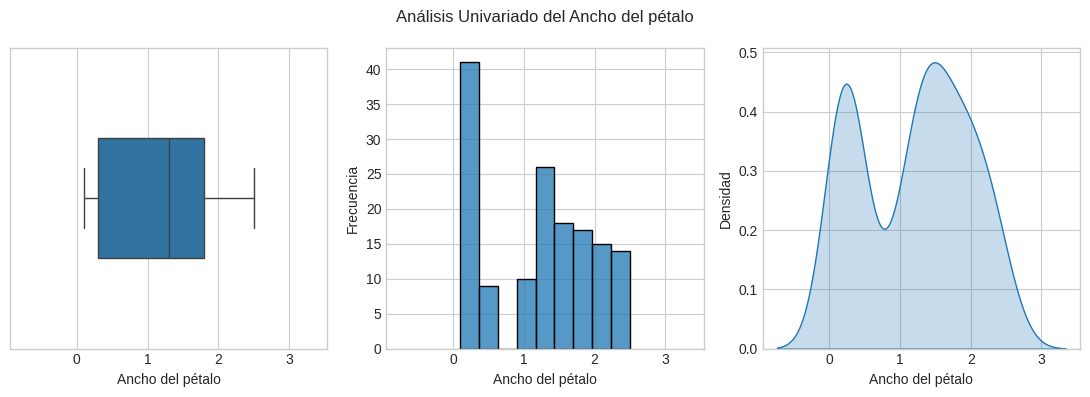

In [ ]:
var = 'petal_w'
var_title = 'Ancho del pétalo'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(11, 4), sharex=True)

# Plotea el boxplot
sns.boxplot(data=df[var], ax=ax[0], orient='h', width=0.4)
ax[0].set_xlabel(var_title)

# Plotea el histograma
sns.histplot(data=df[var], ax=ax[1], kde=False)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Frecuencia')

# Plotea la curva de densidad
sns.kdeplot(data=df[var], ax=ax[2], fill=True)
ax[2].set_xlabel(var_title)
ax[2].set_ylabel('Densidad')

fig.suptitle('Análisis Univariado del ' + var_title)

plt.tight_layout()

# 4. Análisis Multivariado

## 4.1. Longitud del Sépalo vs Especies

Según estos diferentes gráficos, la longitud del sépalo puede ser una característica interesante para clasificar las diferentes especies.

- La longitud del sépalo de las flores de Iris-setosa es principalmente menor que la longitud del pétalo de las otras dos especies
- La diferencia es menos clara entre Iris-versicolor e Iris-virginica.

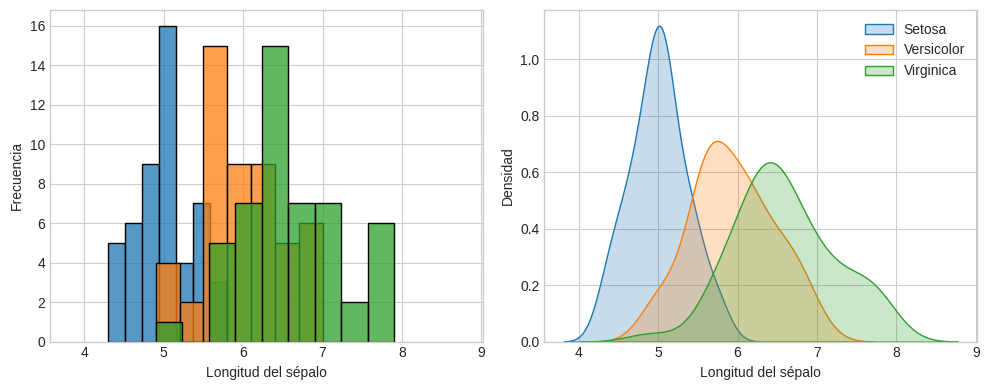

In [ ]:
var = 'sepal_l'
var_title = 'Longitud del sépalo'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_setosa, x=var, label="Setosa", kde=False, ax=ax[0])
sns.histplot(data=df_versicolor, x=var, label="Versicolor", kde=False, ax=ax[0])
sns.histplot(data=df_virginica, x=var, label="Virginica", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

# Curva de densidad para cada especie
sns.kdeplot(data=df_setosa, x=var, label="Setosa", fill=True, ax=ax[1])
sns.kdeplot(data=df_versicolor, x=var, label="Versicolor", fill=True, ax=ax[1])
sns.kdeplot(data=df_virginica, x=var, label="Virginica", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()

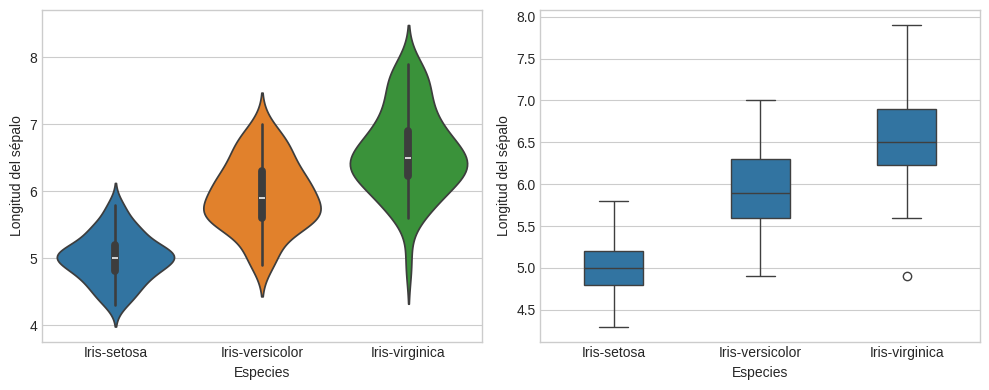

In [ ]:
var = 'sepal_l'
var_title = 'Longitud del sépalo'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Plotea el diagrama de violín
sns.violinplot(data=df, x='species', y=var, ax=ax[0], hue='species')
ax[0].set_xlabel('Especies')
ax[0].set_ylabel(var_title)
#ax[0].get_legend().remove()

# Plotea el boxplot
sns.boxplot(data=df, x='species', y=var, ax=ax[1], width=.4)
ax[1].set_xlabel('Especies')
ax[1].set_ylabel(var_title)

plt.tight_layout()

## 4.2. Ancho del Sépalo vs Especies

Según estos gráficos, la anchura del sépalo parece ser la característica menos útil para clasificar las diferentes especies.

- La anchura del sépalo de setosa parece ser mayor que las demás especies, pero en muchas muestras esta diferencia de tamaño no es cierta.
- La anchura del sépalo entre virginica e setosa es bastante similar.

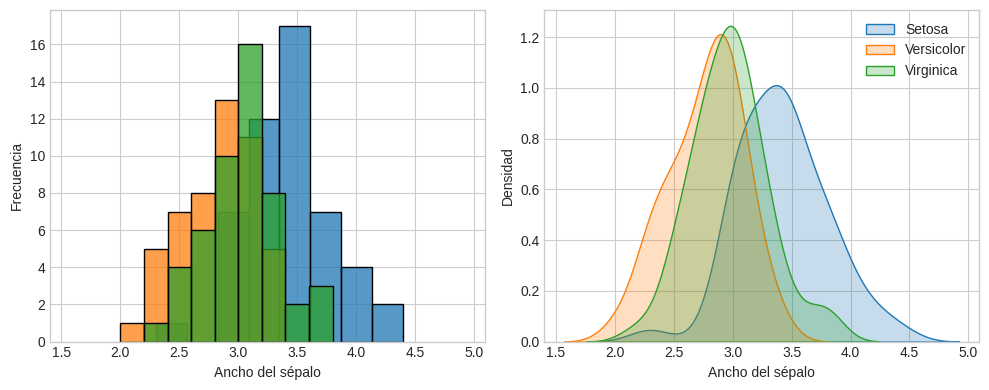

In [ ]:
var = 'sepal_w'
var_title = 'Ancho del sépalo'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_setosa, x=var, label="Setosa", kde=False, ax=ax[0])
sns.histplot(data=df_versicolor, x=var, label="Versicolor", kde=False, ax=ax[0])
sns.histplot(data=df_virginica, x=var, label="Virginica", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

# Curva de densidad para cada especie
sns.kdeplot(data=df_setosa, x=var, label="Setosa", fill=True, ax=ax[1])
sns.kdeplot(data=df_versicolor, x=var, label="Versicolor", fill=True, ax=ax[1])
sns.kdeplot(data=df_virginica, x=var, label="Virginica", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()

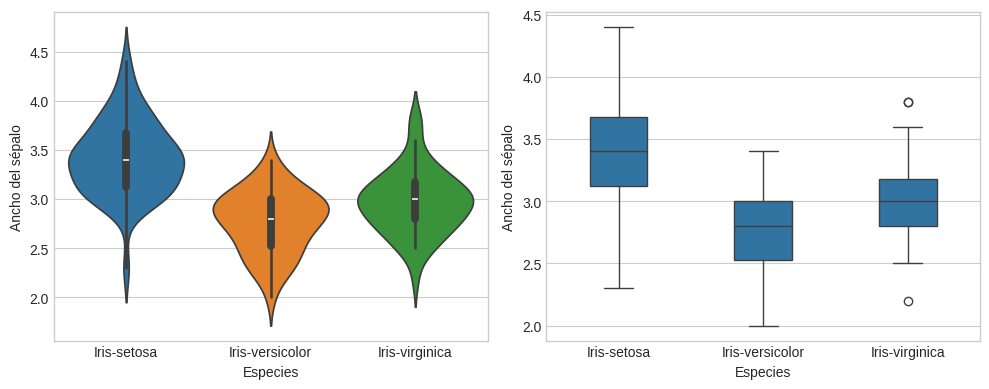

In [ ]:
var = 'sepal_w'
var_title = 'Ancho del sépalo'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Plotea el diagrama de violín
sns.violinplot(data=df, x='species', y=var, ax=ax[0], hue='species')
ax[0].set_xlabel('Especies')
ax[0].set_ylabel(var_title)
#ax[0].get_legend().remove()

# Plotea el boxplot
sns.boxplot(data=df, x='species', y=var, ax=ax[1], width=.4)
ax[1].set_xlabel('Especies')
ax[1].set_ylabel(var_title)

plt.tight_layout()

## 4.3. Longitud del Pétalo vs Especies

Según estos diferentes gráficos, la longitud de los pétalos parece ser una característica importante en la clasificación de las diferentes especies.

- La longitud de los pétalos de las flores de setosa es claramente inferior a la de las otras dos especies
- Aunque la diferencia de longitud de los pétalos es menos clara entre versicolor e virginica, la longitud de las flores versicolor es principalmente menor que las de virginica

En consecuencia, basándose en la longitud de los pétalos, la setosa es separable, mientras que las otras dos especies pueden solaparse.

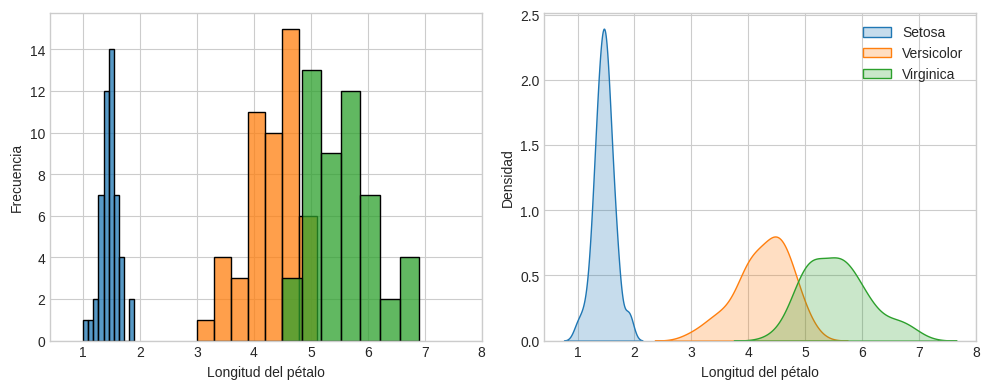

In [ ]:
var = 'petal_l'
var_title = 'Longitud del pétalo'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_setosa, x=var, label="Setosa", kde=False, ax=ax[0])
sns.histplot(data=df_versicolor, x=var, label="Versicolor", kde=False, ax=ax[0])
sns.histplot(data=df_virginica, x=var, label="Virginica", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

# Curva de densidad para cada especie
sns.kdeplot(data=df_setosa, x=var, label="Setosa", fill=True, ax=ax[1])
sns.kdeplot(data=df_versicolor, x=var, label="Versicolor", fill=True, ax=ax[1])
sns.kdeplot(data=df_virginica, x=var, label="Virginica", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()

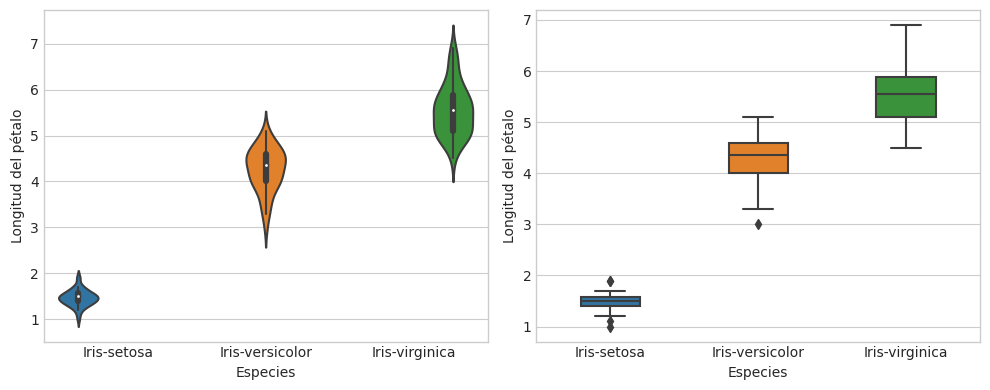

In [ ]:
var = 'petal_l'
var_title = 'Longitud del pétalo'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Plotea el diagrama de violín
sns.violinplot(data=df, x='species', y=var, ax=ax[0], hue='species')
ax[0].set_xlabel('Especies')
ax[0].set_ylabel(var_title)
ax[0].get_legend().remove()

# Plotea el boxplot
sns.boxplot(data=df, x='species', y=var, ax=ax[1], width=.4)
ax[1].set_xlabel('Especies')
ax[1].set_ylabel(var_title)

plt.tight_layout()

## 4.4. Ancho del Pétalo vs Especies

Según estos diferentes gráficos, el ancho de los pétalos también puede ser una característica útil en la clasificación de las especies.

- La longitud de los pétalos de las flores de setosa es claramente inferior a las demás especies.
- Aunque la diferencia es menor entre versicolor e virginica, la longitud de las flores versicolor en su mayoria es inferior a las de virginica

En función del ancho de los pétalos, la setosa es facilmente separable, mientras que algunas porciones de la distribución de versicolor y virginica estan mezcladas.

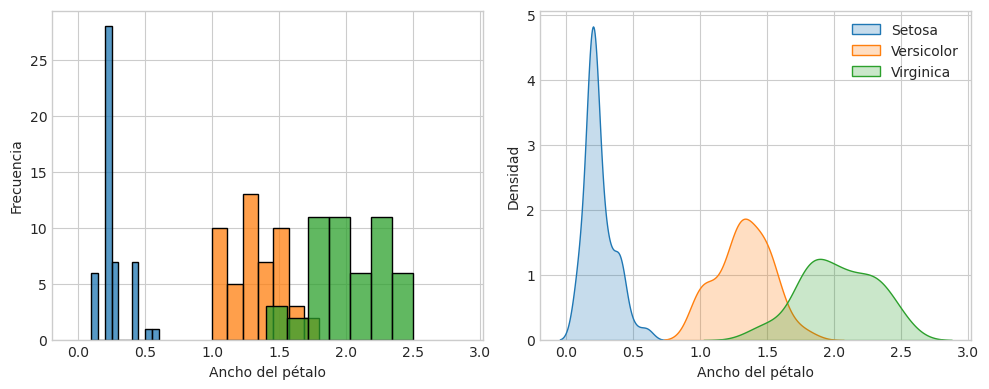

In [ ]:
var = 'petal_w'
var_title = 'Ancho del pétalo'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_setosa, x=var, label="Setosa", kde=False, ax=ax[0])
sns.histplot(data=df_versicolor, x=var, label="Versicolor", kde=False, ax=ax[0])
sns.histplot(data=df_virginica, x=var, label="Virginica", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

# Curva de densidad para cada especie
sns.kdeplot(data=df_setosa, x=var, label="Setosa", fill=True, ax=ax[1])
sns.kdeplot(data=df_versicolor, x=var, label="Versicolor", fill=True, ax=ax[1])
sns.kdeplot(data=df_virginica, x=var, label="Virginica", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()

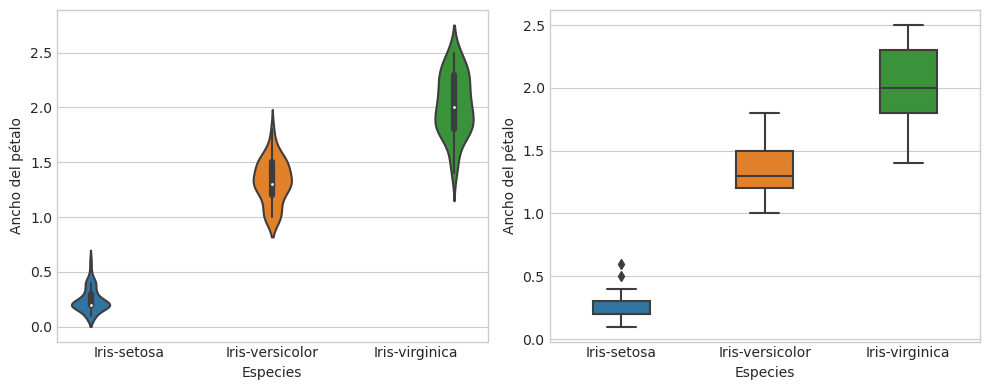

In [ ]:
var = 'petal_w'
var_title = 'Ancho del pétalo'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Plotea el diagrama de violín
sns.violinplot(data=df, x='species', y=var, ax=ax[0], hue='species')
ax[0].set_xlabel('Especies')
ax[0].set_ylabel(var_title)
ax[0].get_legend().remove()

# Plotea el boxplot
sns.boxplot(data=df, x='species', y=var, ax=ax[1], width=.4)
ax[1].set_xlabel('Especies')
ax[1].set_ylabel(var_title)

plt.tight_layout()

## 4.5. Longitud vs Ancho del Sépalo

Se nota que es bastante difícil separar las especies basándose únicamente en la longitud o ancho de los sépalos, además, en el caso de los petalos algunas porciones de las distribuciones estan mezcladas, por lo que se pueden generar errores de clasificación.

Entonces, se procede a analizar las variables combinadas.

Al graficar la longitud vs el ancho de sépalo se puede observar lo siguiente:
- La especie setosa tiende a tener un ancho mayor y una longitud inferior que las demás.
- Muchas flores versicolor también tienen una longitud pequeña en su sepalo. Mientras que las flores virginica tienden a ser mayores.
- Las flores setosa tienen una variabilidad mayor en el ancho que las demás especies.

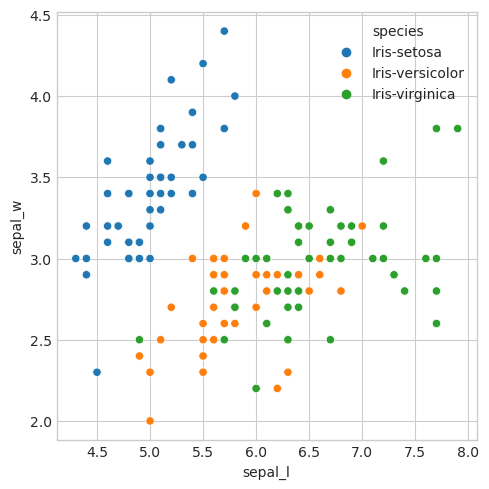

In [ ]:
# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(figsize=(5, 5))
sns.scatterplot(data=df, x="sepal_l", y="sepal_w", ax=ax, hue="species")
plt.tight_layout()

También se puede utilizar `jointplot` para ver la relación entre la distribución de los datos, además de mostrar dónde se localizan los valores.

- Se observa que la mayoría de flores generalmente tiene un ancho de sépalo de 3.5 cm y un largo de 5 cm.

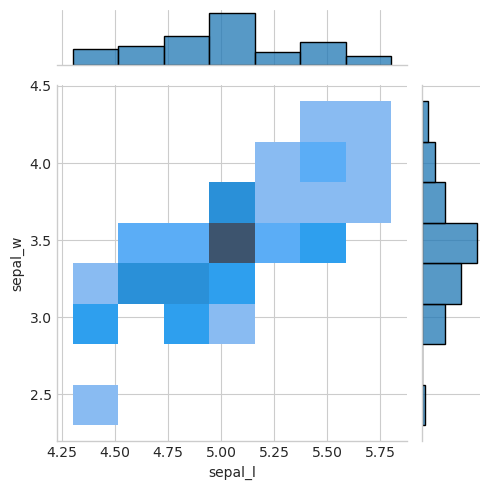

In [ ]:
sns.jointplot(data=df_setosa, x="sepal_l", y="sepal_w", kind='hist', height=5)
plt.tight_layout()

## 4.6. Longitud vs Ancho del Pétalo

La longitud de los pétalos y la anchura de los pétalos son características muy útiles que indican claramente muchas cosas.

- Tienden a una relación positiva, lo que significa que si uno aumenta, el otro valor también aumenta.
- Las dimensiones de los pétalos son evidentemente más pequeños para setosa, tanto en ancho como en longitud.
- La especie setosa esta claramente agrupada
- Las flores versicolor son más pequeñas que las flores verginica, aunque en este caso la línea divisoria entre estas especies es un poco más imprecisa.

<AxesSubplot:xlabel='petal_l', ylabel='petal_w'>

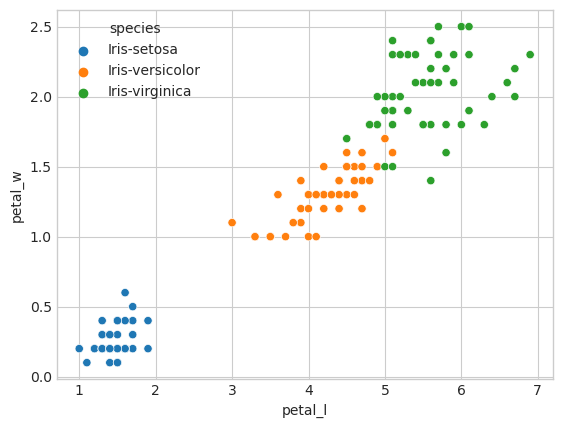

In [ ]:
sns.scatterplot(data=df, x="petal_l", y="petal_w", hue="species")

- Se observa que la mayoría de flores generalmente tiene un ancho de sépalo entre 1.3 a 1.5 cm, y un largo de 4 a 4.7 cm.

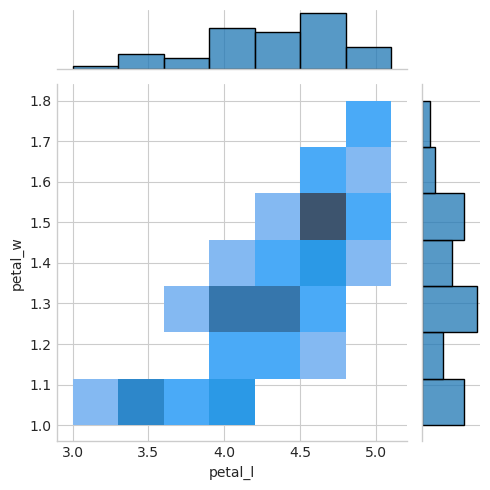

In [ ]:
sns.jointplot(data=df_versicolor, x="petal_l", y="petal_w", kind='hist', height=5)
plt.tight_layout()

## 4.5. Todas las caracteristicas vs Especies

Un gráfico en el que se puede ver todos los datos numéricos comparados con todos los datos numéricos

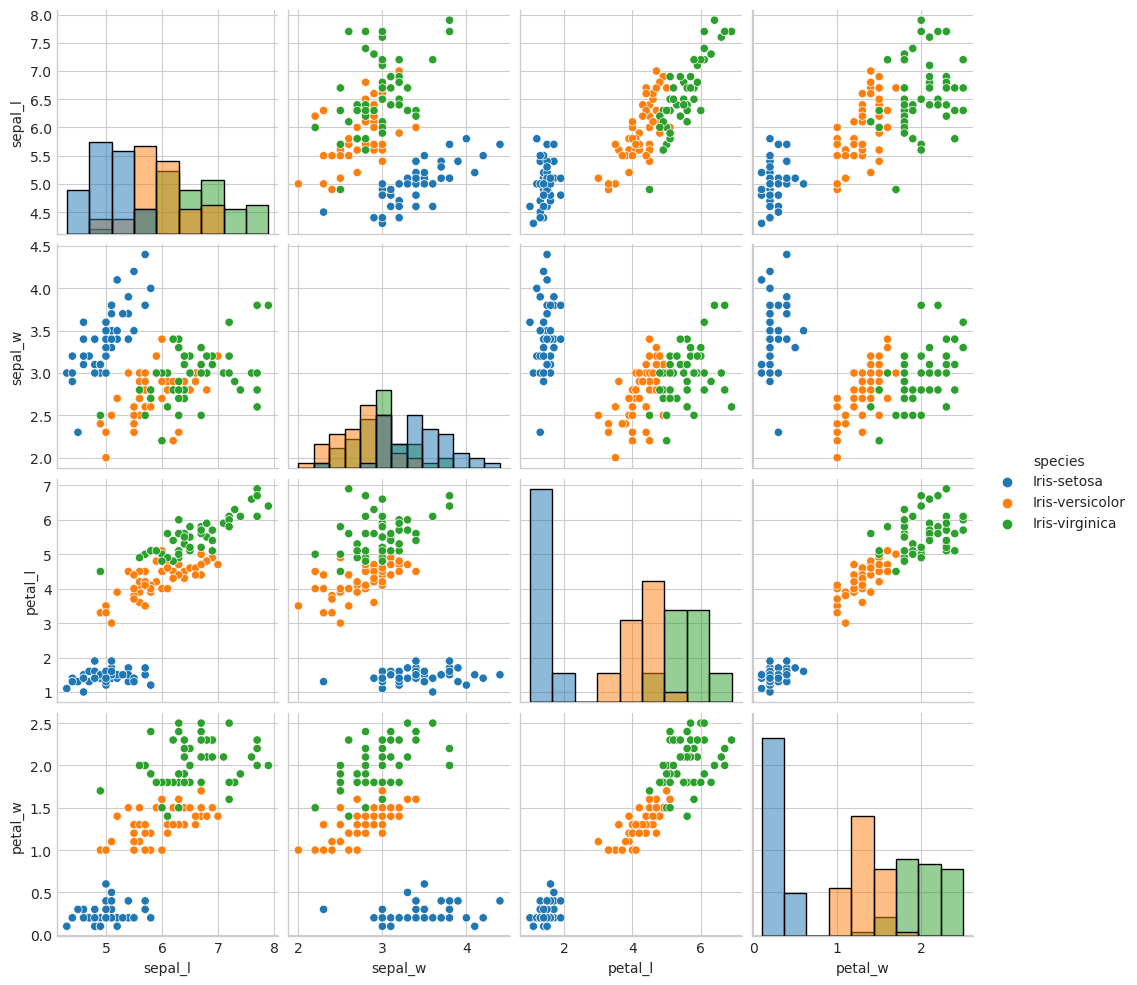

In [ ]:
sns.pairplot(df, hue="species", diag_kind="hist")

## 4.6 Correlación entre variables

In [ ]:
df.corr()

,sepal_l,sepal_w,petal_l,petal_w
sepal_l,1.000000,-0.109369,0.871754,0.817954
sepal_w,-0.109369,1.000000,-0.420516,-0.356544
petal_l,0.871754,-0.420516,1.000000,0.962757
petal_w,0.817954,-0.356544,0.962757,1.000000


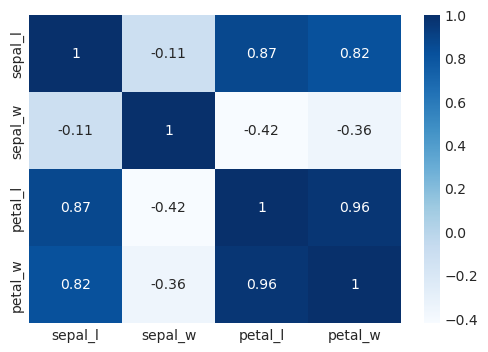

In [ ]:
fig = plt.figure(figsize = (6,4))
sns.heatmap(df.corr(), cmap='Blues', annot=True);

Observaciones:

- Alta correlación positiva entre la longitud del pétalo y su ancho (0,96)

- Alta correlación positiva entre la longitud de los pétalos y la longitud de los sépalos (0,87)

- Alta correlación positiva entre el ancho del pétalo y la longitud del sépalo (0,82)

Entonces, se observa correlaciones entre estos atributos principales: Anchura del pétalo, Longitud del pétalo y Longitud del sépalo.

# 5. Conclusiones EDA

- El dataset es balanceado.
- Se tienen 4 columnas númericas y 1 columna categoricas, que se convertirá en el target del modelo.
- Se presenta una fuerte correlación positiva entre el ancho y la longitud de los pétalos.
- La flor setosa es la más fácil de distinguir debido a sus dimensiones pequeñas.
- Las especies versicolor y virginica suelen estar mezcladas y a veces son difíciles de separar.
- Las flores versicolor suelen tener rasgos de dimensión media, mientras que la virginica tienen mayor tamaño.
- Las dimensiones de los pétalos parecen ser la mejor información para distinguir las especies, lo cual será útil al desarrollar modelos de Machine learning con este dataset.

In [ ]:
import plotly.express as px
df = px.data.iris() # iris is a pandas DataFrame
fig = px.scatter(df, x="sepal_width", y="sepal_length")
fig.show()